<a href="https://colab.research.google.com/github/wuba2010work/CWP/blob/main/Amibara_seasonal_ETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rioxarray --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.6 MB/s eta 0:00:00


In [2]:
import os
import glob
import datetime
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
#To upload file.
uploaded = files.upload()

Saving AmibL_2.zip to AmibL_2.zip


In [4]:
# unzip the uploaded zipfile
!unzip '/content/AmibL_2.zip' -d '/content/'

Archive:  /content/AmibL_2.zip
   creating: /content/content/output/
   creating: /content/content/output/L2-AETI-D/
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-06-01.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-08-21.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-11.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-21.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-11-21.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-06-11.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-01-21.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-07-01.tif  
  inflating: /content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-0

In [5]:
# Open first raster from your unzipped files and mask out nan values
ds = rio.open_rasterio('/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

In [6]:
# Inspect the contents - How many pixels does the raster contain?
ds

<xarray.DataArray (band: 1, y: 268, x: 160)> Size: 343kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 1kB 40.1 40.1 40.1 40.1 ... 40.25 40.25 40.25 40.25
  * y            (y) float64 2kB 9.464 9.463 9.462 9.461 ... 9.206 9.205 9.204
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:            Area
    end_date:                 2024-10-10
    long_name:                2024-10-01
    number_of_days:           10
    original_units:           mm/day
    overview:                 NONE
    ...                       ...
    temporal_resolution:      Dekad
    units:                    mm/dekad
    units_conversion_factor:  10
    _FillValue:               -9999.0
    scale_factor:             1.0
    add_offset:               0.0

In [7]:
#The values contained are stored as an array with each value representing one pixel.
ds.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

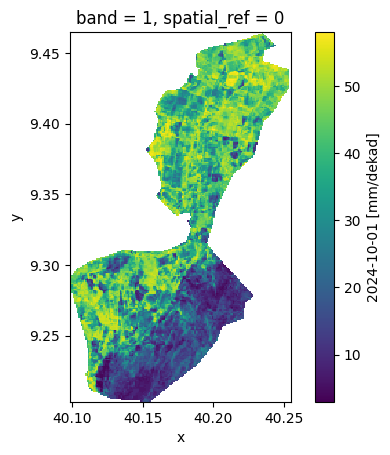

In [8]:
# We can produce a quick map of our data using the plot function
ds[0].plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [9]:
#check the min, max and mean values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

3.0 58.0 33.350176510880445


In [10]:
# seasonal AETI from Dekadal ETa
glob.glob('/content/content/output/L2-AETI-D/*.tif')

['/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-08-21.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-21.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-08-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-03-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-03-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-09-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-08-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-04-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-02-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-06-01.tif',
 '/content/content/output/L2-AET

In [12]:
glob.glob('/content/content/output/L2-AETI-D/*2024-10*.tif')

['/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-21.tif']

In [14]:
# Example to get files from October 2022
glob.glob('/content/content/output/L2-AETI-D/*2024-10*.tif')

['/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-01.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-11.tif',
 '/content/content/output/L2-AETI-D/map_L2-AETI-D_NONE_dekad_converted_2024-10-21.tif']

In [16]:
for i, fp in enumerate(glob.glob('/content/content/output/L2-AETI-D/*.tif')):
  fn = os.path.basename(fp)
  # OPEN DATA
  ds = rio.open_rasterio(fp)
  ds = ds.where(ds!=ds.attrs['_FillValue'])
  if i == 0:
    ds_sum = ds #Initialize sum if we are looking at the first raster
  else:
    ds_sum += ds #This is the python way of writing ds_sum = ds_sum + ds

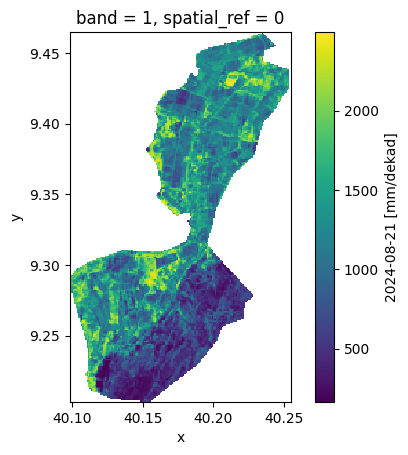

In [17]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [18]:
#Inspect Attributes to see which ones we will update
attrs = ds_sum.attrs
attrs

{'AREA_OR_POINT': 'Area',
 'end_date': '2024-08-31',
 'long_name': '2024-08-21',
 'number_of_days': 11,
 'original_units': 'mm/day',
 'overview': 'NONE',
 'start_date': '2024-08-21',
 'temporal_resolution': 'Dekad',
 'units': 'mm/dekad',
 'units_conversion_factor': 11,
 '_FillValue': np.float64(-9999.0),
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [19]:
attrs.update({'start_date': '2024-01-01',
              'end_date': '2024-06-30',
              'units' : 'mm/season'})
del attrs['number_of_days']

ds_sum.attrs  = attrs

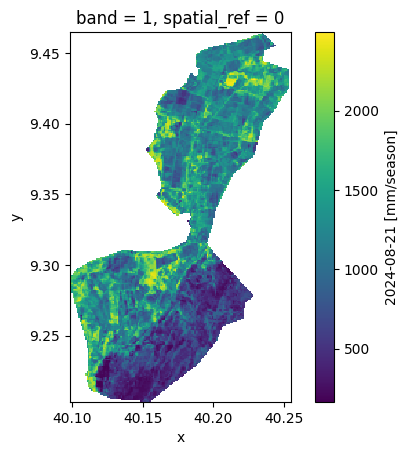

In [20]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [21]:
# Save the seasonal sum to a TIFF file and download to your local drive
ds_sum.rio.to_raster("Ambr_seasonal_AETI.tif")
files.download(r'/content/Ambr_seasonal_AETI.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Install required packages
%%capture
!pip install --upgrade xarray  --quiet
!pip install --upgrade geopandas --quiet
!pip install --upgrade rioxarray --quiet
!pip install rasterstats

In [23]:
# Import the required packages
from osgeo import gdal
import xarray as xr
import rioxarray as rioxr
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import os
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
import matplotlib.colors as mcolors

In [24]:
#To upload file.
from google.colab import files
uploaded = files.upload()

Saving Ambr_seasonal_AETI.tif to Ambr_seasonal_AETI (1).tif


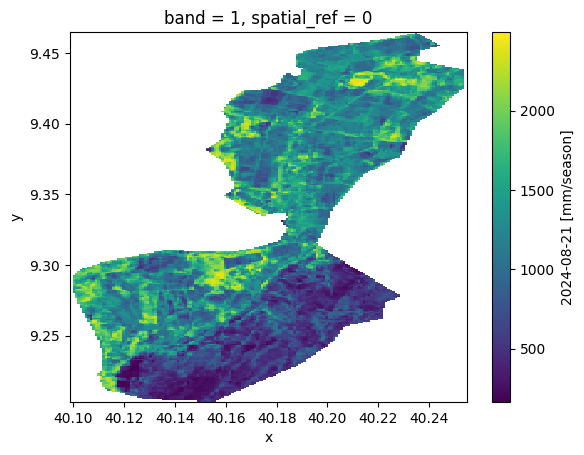

In [25]:
seasonal_AETI = '/content/Ambr_seasonal_AETI.tif'      # Path to seasonal file
seasonal = rioxr.open_rasterio(seasonal_AETI)             # open the raster file
seasonal.plot()                                         # Display the raster file

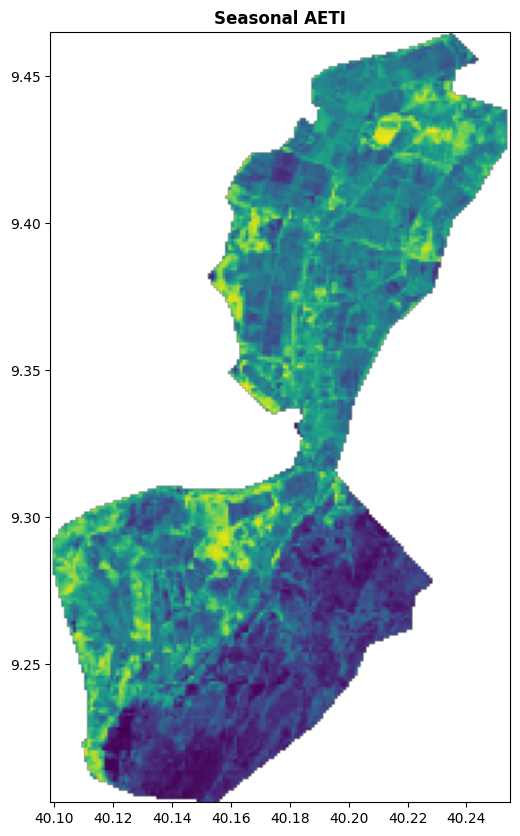

In [26]:
with rio.open(seasonal_AETI) as seasonal:                        # Open the raster file
    fig, ax = plt.subplots(figsize=(10, 10))                # Create a matplotlib figure and axis object with a specified size
    show(seasonal, ax=ax, title='Seasonal AETI')                 # Use rasterio's show function to display the raster data on the axes
    plt.show()                                              # Display the plot

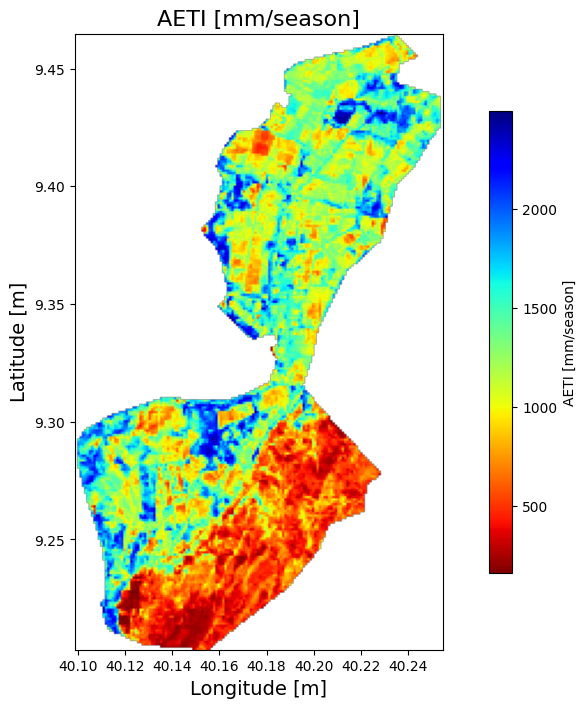

In [27]:
seasonal = rio.open(seasonal_AETI)
spatial_extent = (seasonal.bounds.left, seasonal.bounds.right, seasonal.bounds.bottom, seasonal.bounds.top)

# Read the first band
data = seasonal.read(1)

# Plotting
plt.figure(figsize=(12, 8))
plt.imshow(data, cmap='jet_r', vmin=np.nanmin(data), vmax=np.nanmax(data), extent=spatial_extent)
plt.colorbar(shrink=0.75, label='AETI [mm/season]')
plt.xlabel('Longitude [m]', fontsize=14)
plt.ylabel('Latitude [m]', fontsize=14)
plt.title('AETI [mm/season]', fontsize=16)
plt.show()